In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [37]:
# loading up the dataset from https://archive.ics.uci.edu/ml/datasets.php
data = pd.read_csv('abalone.csv', header=None)


In [38]:
data[[1, 2, 3, 4, 5, 6, 7, 8]] # the columns that contain the data that we're interested in


,1,2,3,4,5,6,7,8
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [39]:
data[[0]] # the data with the target columns


,0
0,M
1,M
2,F
3,M
4,I
...,...
4172,F
4173,M
4174,M
4175,F


In [40]:
X = data[[1, 2, 3, 4, 5, 6, 7, 8]].values # storing the data vals for reuse


In [41]:
# I reuse the draw code, so I may as well make it into a function 
def draw_reduced(X, Y):
    X_df = pd.DataFrame(data = X, columns = ['X', 'Y'])
    finalDf = pd.concat([X_df, Y], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('X', fontsize = 15)
    ax.set_ylabel('Y', fontsize = 15)
    ax.set_title('2 dimension reduced dataset', fontsize = 20)
    targets = ['M', 'F', 'I']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[0]==target
        ax.scatter(finalDf.loc[indicesToKeep, 'X'], finalDf.loc[indicesToKeep, 'Y'], c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    

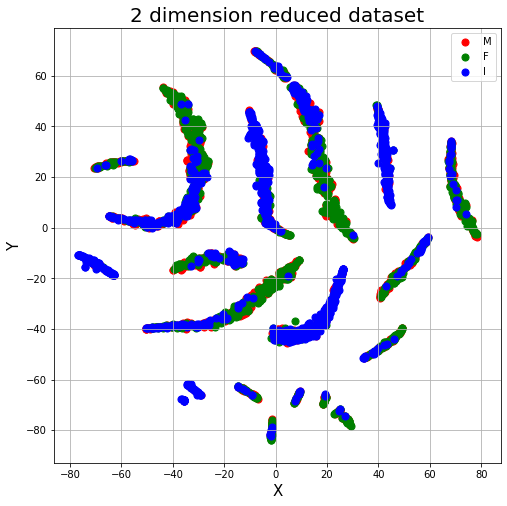

In [44]:
draw_reduced(TSNE(n_components=2).fit_transform(X), data[[0]])


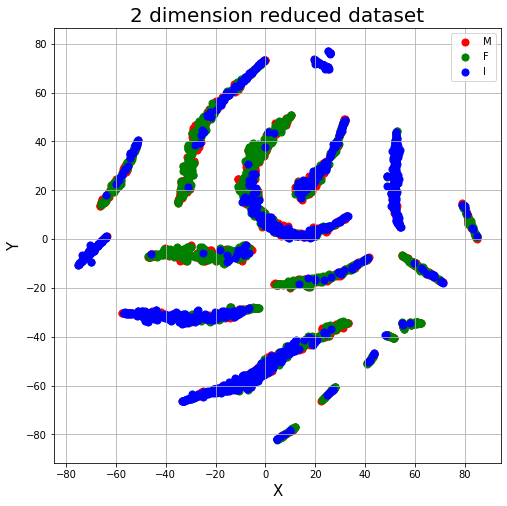

In [45]:
# just visualizing the fact that the function's non-deterministic
draw_reduced(TSNE(n_components=2).fit_transform(X), data[[0]])


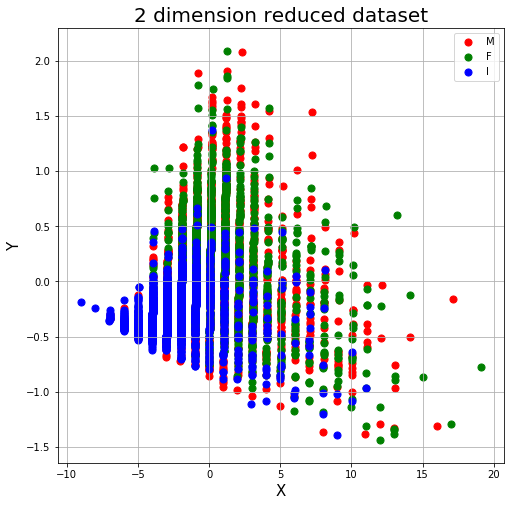

In [46]:
pca = PCA(n_components=2)
draw_reduced(pca.fit_transform(X), data[[0]])


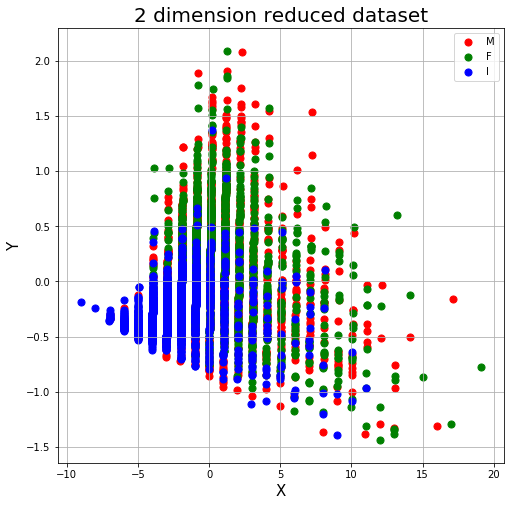

In [47]:
# unlike PCA that is deterministic
pca = PCA(n_components=2)
draw_reduced(pca.fit_transform(X), data[[0]])
